In [1]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm; tqdm.pandas()
pd.options.display.max_columns = 202
pd.options.display.max_rows = 300
import seaborn as sns

In [2]:
train = pd.read_pickle('data/train_original.pkl')
test = pd.read_pickle('data/test_original.pkl')
special_cols = [col for col in train.columns if train[col].dtype != np.float64]
feature_cols = [col for col in train.columns if col not in special_cols]

In [3]:
train.drop(special_cols[0], axis=1, inplace=True)
test.drop(special_cols[0], axis=1, inplace=True)

In [4]:
unique_samples = []
unique_count = np.zeros_like(test)
for feature in tqdm(range(test.shape[1])):
    _, index_, count_ = np.unique(test.values[:, feature], return_counts=True, return_index=True)
    unique_count[index_[count_ == 1], feature] += 1

# Samples which have unique values are real the others are fake
real_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) > 0)[:, 0]
synthetic_samples_indexes = np.argwhere(np.sum(unique_count, axis=1) == 0)[:, 0]

fake_test=test.iloc[synthetic_samples_indexes].reset_index(drop=True)
test=test.iloc[real_samples_indexes].reset_index(drop=True)

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:06<00:00, 33.32it/s]


In [5]:
train.shape, test.shape

((200000, 201), (100000, 200))

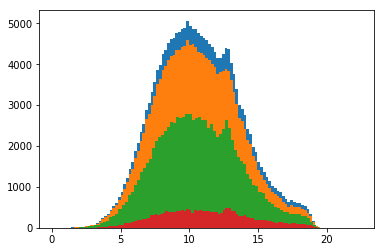

In [6]:
col = 'var_0'
plt.hist(train[col], bins=100);
plt.hist(train.loc[train.target==0, col], bins=100);
plt.hist(test[col], bins=100); 
plt.hist(train.loc[train.target==1, col], bins=100); plt.show()

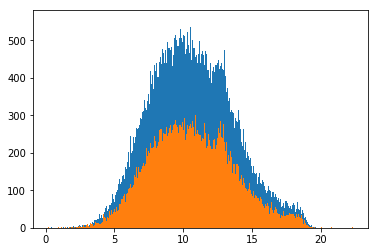

In [7]:
col = 'var_0'
plt.hist(train[col], bins=1000);
plt.hist(test[col], bins=1000); plt.show()

94672


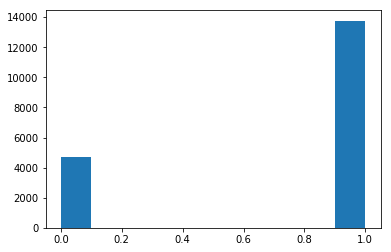

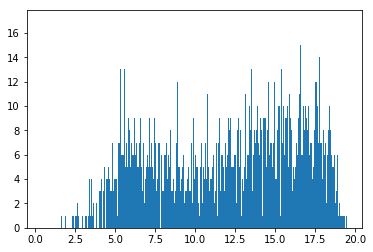

In [8]:
col = 'var_0'
vals_0 = train.loc[train.target==0, col]
vals_1 = train.loc[train.target==1, col]
vals_0 = pd.Series(vals_0.unique())
vals_1 = pd.Series(vals_1.unique())
print(train.loc[:, col].nunique())
plt.hist(vals_1.isin(vals_0).astype(np.int)); plt.show()
plt.hist(vals_1[~vals_1.isin(vals_0)], bins=1000); plt.show()

In [10]:
train[['target']+feature_cols].iloc[:10000,].corr('spearman').sort_values('target', ascending=False)[['target']]

,target
target,1.000000
var_26,0.064780
var_1,0.060204
var_53,0.056430
var_2,0.054718
var_67,0.053385
var_151,0.053148
var_190,0.052683
var_184,0.046785
var_18,0.046687


In [12]:
selected_features = []
for f in tqdm(feature_cols):
    train[f+'_fake_cnt'] = train[f].isin(fake_test[f]).astype(int)
    test[f+'_fake_cnt'] = test[f].isin(fake_test[f]).astype(int)
    selected_features += [f+'_fake_cnt']
train[['target']+selected_features].iloc[:10000,].corr('spearman').sort_values('target', ascending=False)[['target']]

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:47<00:00,  5.48it/s]


,target
target,1.000000
var_103_fake_cnt,0.023324
var_97_fake_cnt,0.022026
var_173_fake_cnt,0.017412
var_42_fake_cnt,0.016676
var_18_fake_cnt,0.014933
var_135_fake_cnt,0.014718
var_176_fake_cnt,0.013109
var_153_fake_cnt,0.012791
var_85_fake_cnt,0.012781


In [13]:
train[selected_features].to_pickle('features/is_in_fake_train.pkl')
test[selected_features].to_pickle('features/is_in_fake_test.pkl')

In [11]:
selected_features = []
for f in tqdm(feature_cols):
    vc = fake_test[f].value_counts()
    train[f+'_fake_cnt'] = train[f].map(vc).fillna(-999)
    selected_features += [f+'_fake_cnt']
train[['target']+selected_features].iloc[:10000,].corr('spearman').sort_values('target', ascending=False)[['target']]

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [00:12<00:00, 16.62it/s]


,target
target,1.000000
var_97_fake_cnt,0.022368
var_59_fake_cnt,0.020458
var_173_fake_cnt,0.017172
var_135_fake_cnt,0.016366
var_18_fake_cnt,0.015389
var_176_fake_cnt,0.013066
var_33_fake_cnt,0.012318
var_85_fake_cnt,0.012221
var_77_fake_cnt,0.010983
